Problem 1

---


1)

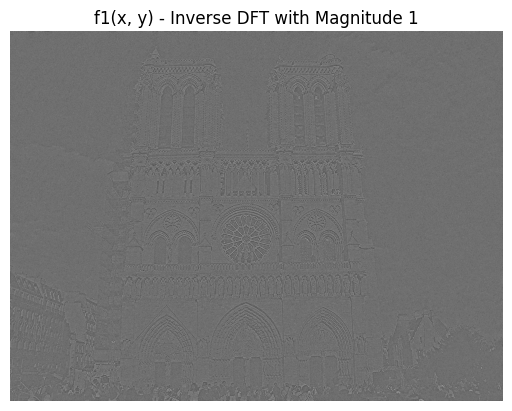

'f1_xy.jpg'

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

def compute_inverse_dft(image_path):
    # Load the image from the file system
    image = plt.imread(image_path)

    # Check if the image is RGB and convert it to grayscale
    if image.ndim == 3:
        image = np.mean(image, axis=2)

    # Perform FFT and shift the zero frequency component to the center
    F_uv = fftshift(fft2(image))

    # Set magnitude to 1 for all frequencies and keep the original phase
    magnitude = np.ones(F_uv.shape)  # Set magnitude to 1 for all frequencies
    phase = np.angle(F_uv)
    F1_uv = magnitude * np.exp(1j * phase)

    # Compute the inverse DFT to get the spatial domain representation
    f1_xy = np.real(ifft2(fftshift(F1_uv)))

    # Display the image
    plt.imshow(f1_xy, cmap='gray')
    plt.title('f1(x, y) - Inverse DFT with Magnitude 1')
    plt.axis('off')
    plt.show()

    # Save the image to disk
    f1_image_path = 'f1_xy.jpg'
    plt.imsave(f1_image_path, f1_xy, cmap='gray')

    return f1_image_path

# path to your image file
compute_inverse_dft('problem1.pgm')

2)

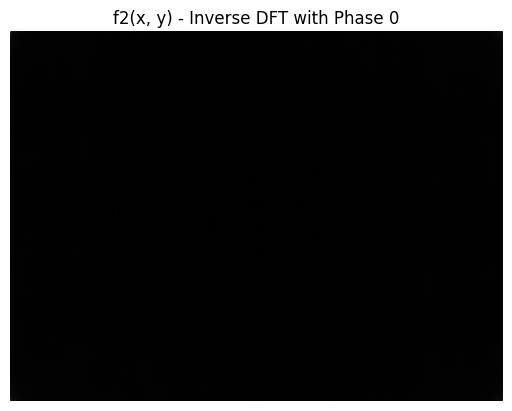

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

# Load your image here
image_path = 'problem1.pgm'
image = plt.imread(image_path)

# If the image is in color (RGB), convert it to grayscale
if image.ndim == 3:
    image = np.mean(image, axis=2)

# Compute the DFT of the image
F_uv = fftshift(fft2(image))

# Obtain the magnitude from the original DFT and set phase to 0
magnitude = np.abs(F_uv)
phase = np.zeros(F_uv.shape)

# Create a new frequency domain representation with the original magnitude and zero phase
F2_uv = magnitude * np.exp(1j * phase)

# Compute the inverse DFT to get the spatial domain representation
f2_xy = np.real(ifft2(fftshift(F2_uv)))

# Display the resulting image
plt.imshow(f2_xy, cmap='gray')
plt.title('f2(x, y) - Inverse DFT with Phase 0')
plt.axis('off')
plt.show()

# Save the resulting image to disk
f2_image_path = 'f2_xy.jpg'
plt.imsave(f2_image_path, f2_xy, cmap='gray')



4)

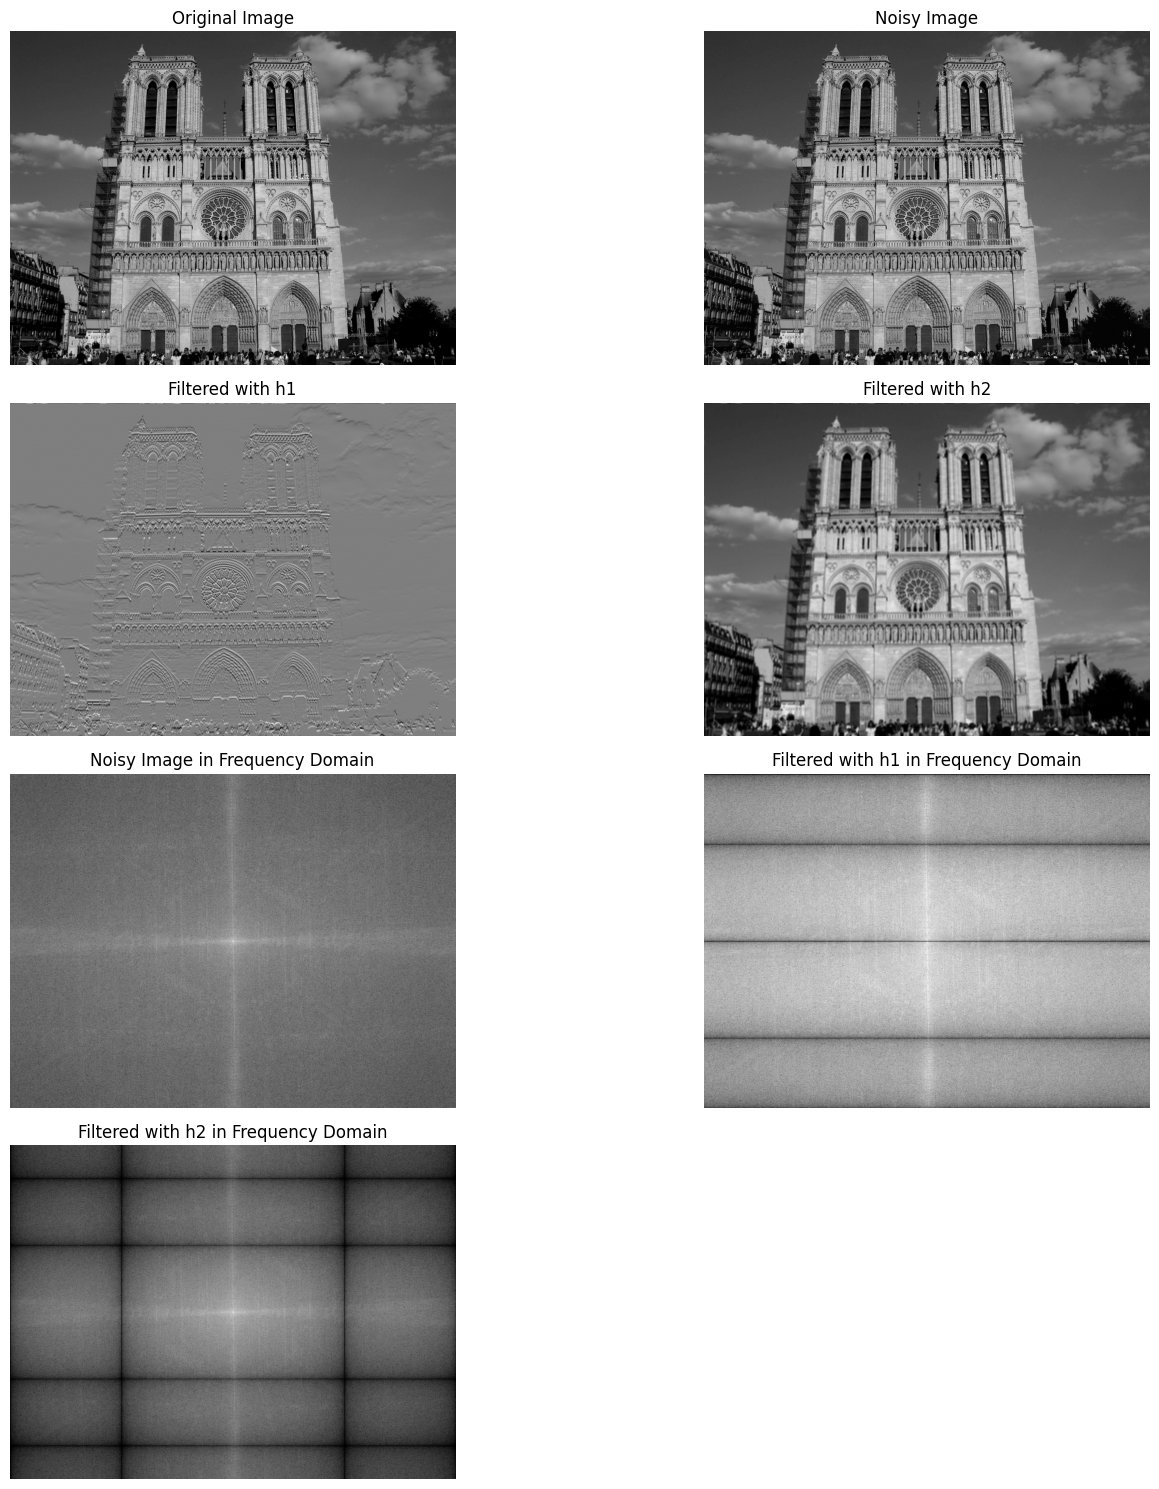

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

def apply_filter_in_frequency_domain(image_fft, filter_kernel):
    # Zero-pad the filter kernel to the size of the FFT image
    padded_filter = np.zeros_like(image_fft)
    kernel_size = filter_kernel.shape
    padded_filter[:kernel_size[0], :kernel_size[1]] = filter_kernel

    # FFT of the padded filter
    filter_fft = fftshift(fft2(padded_filter))

    # Multiply elementwise in the frequency domain
    filtered_fft = image_fft * filter_fft

    return filtered_fft

# Load your image here
image_path = 'problem1.pgm'
image = plt.imread(image_path)

# If the image is in color, convert it to grayscale
if image.ndim == 3:
    image = np.mean(image, axis=2)

# Define the filters
h1 = np.array([[0, -1/3, 0],
               [0, -1/6, 0],
               [0, 0, 0],
               [0, 1/6, 0],
               [0, 1/3, 0]])

h2 = np.array([[1/25, 1/25, 1/25, 1/25],
               [1/25, 1/25, 1/25, 1/25],
               [1/25, 1/25, 1/25, 1/25],
               [1/25, 1/25, 1/25, 1/25],
               [1/25, 1/25, 1/25, 1/25]])

# Generate noise with mean = 0 and std = 0.1
mean = 0
std = 1 # Increase or decrease noise level (std = 0.1, 0.01)
noise = np.random.normal(mean, std, image.shape)

# Apply noise in the frequency domain
F_uv = fftshift(fft2(image))
N_uv = fftshift(fft2(noise))
noisy_F_uv = F_uv + N_uv

# Apply h1 and h2 filters in the frequency domain
filtered_F_uv_h1 = apply_filter_in_frequency_domain(noisy_F_uv, h1)
filtered_F_uv_h2 = apply_filter_in_frequency_domain(noisy_F_uv, h2)

# Compute the inverse FFT to get back to spatial domain
filtered_image_h1 = np.real(ifft2(fftshift(filtered_F_uv_h1)))
filtered_image_h2 = np.real(ifft2(fftshift(filtered_F_uv_h2)))
noisy_image = np.real(ifft2(fftshift(noisy_F_uv)))

# Display the images
plt.figure(figsize=(15, 15))

# Original Image in Spatial Domain
plt.subplot(4, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Noisy Image in Spatial Domain
plt.subplot(4, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Filtered Image with h1 in Spatial Domain
plt.subplot(4, 2, 3)
plt.imshow(filtered_image_h1, cmap='gray')
plt.title('Filtered with h1')
plt.axis('off')

# Filtered Image with h2 in Spatial Domain
plt.subplot(4, 2, 4)
plt.imshow(filtered_image_h2, cmap='gray')
plt.title('Filtered with h2')
plt.axis('off')

# Noisy Image in Frequency Domain
plt.subplot(4, 2, 5)
plt.imshow(np.log(np.abs(noisy_F_uv) + 1), cmap='gray')
plt.title('Noisy Image in Frequency Domain')
plt.axis('off')

# Filtered Image with h1 in Frequency Domain
plt.subplot(4, 2, 6)
plt.imshow(np.log(np.abs(filtered_F_uv_h1) + 1), cmap='gray')
plt.title('Filtered with h1 in Frequency Domain')
plt.axis('off')

# Filtered Image with h2 in Frequency Domain
plt.subplot(4, 2, 7)
plt.imshow(np.log(np.abs(filtered_F_uv_h2) + 1), cmap='gray')
plt.title('Filtered with h2 in Frequency Domain')
plt.axis('off')

plt.tight_layout()
plt.show()


Problem 2

---



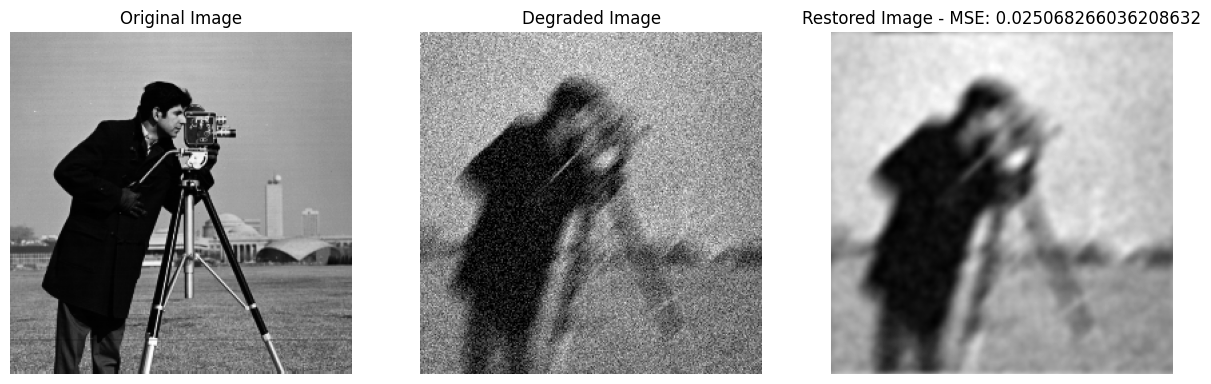

Optimal Wiener Filter Parameters: {'Kernel Size': 1, 'Noise Variance': 0.1}


In [115]:
from skimage.restoration import wiener
from skimage.metrics import mean_squared_error as mse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to apply Wiener filter and calculate MSE against the original image
def optimize_wiener(original, degraded, possible_kernels, noise_estimates):
    best_mse = np.inf
    best_restoration = None
    best_params = {}

    # Iterate over all possible kernels and noise variance estimates
    for k_size in possible_kernels:
        # Hypothetical motion blur kernel (identity matrix implies no additional blur)
        motion_blur_kernel = np.eye(k_size)

        for noise_var in noise_estimates:
            # Apply Wiener filter
            restoration_attempt = wiener(degraded, motion_blur_kernel, 1 / (noise_var + 1e-10))

            # Calculate MSE and update best parameters if current MSE is lower
            current_mse = mse(original, restoration_attempt)
            if current_mse < best_mse:
                best_mse = current_mse
                best_restoration = restoration_attempt
                best_params = {'Kernel Size': k_size, 'Noise Variance': noise_var}

    return best_restoration, best_mse, best_params

# Parameters to test
kernel_options = [1, 3, 5, 7, 9]  # Example kernel sizes
noise_var_options = [0.0001, 0.001, 0.01, 0.1]  # Example noise variances

# Load your original and degraded images here
original_image_path = 'base_image.png'
degraded_image_path = 'problem2.png'

original_image = mpimg.imread(original_image_path)
degraded_image = mpimg.imread(degraded_image_path)

# Convert to grayscale if they are color images
if original_image.ndim == 3:
    original_image = original_image.mean(axis=2)

if degraded_image.ndim == 3:
    degraded_image = degraded_image.mean(axis=2)

# Optimize the Wiener filter
best_image, lowest_mse, optimal_params = optimize_wiener(original_image, degraded_image, kernel_options, noise_var_options)

# Displaying all images for comparison
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Degraded Image
plt.subplot(1, 3, 2)
plt.imshow(degraded_image, cmap='gray')
plt.title('Degraded Image')
plt.axis('off')

# Best Restored Image
plt.subplot(1, 3, 3)
plt.imshow(best_image, cmap='gray')
plt.title(f'Restored Image - MSE: {lowest_mse}')
plt.axis('off')

plt.show()

# Display the best parameters found
print(f'Optimal Wiener Filter Parameters: {optimal_params}')
